![Image Alt Text](assets/image.png)

<div align="center"><h1> Binary Classification with a Bank Churn Dataset (Kaggle competition) </h1></div>


<div align="center"><h1> Problem Understanding and Definition </h1></div>

#### Gain a deep understanding of the problem domain, including the business context and objectives.
#### Define the specific problem to be addressed and the key metrics for success.

Overview

Welcome to the 2024 Kaggle Playground Series! Happy New Year! This is the 1st episode of Season 4. We plan to continue in the spirit of previous playgrounds, providing interesting an approachable datasets for our community to practice their machine learning skills, and anticipate a competition each month.

Your Goal: For this Episode of the Series, your task is to predict whether a customer continues with their account or closes it (e.g., churns). Good luck!

Evaluation

Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

Submission File
For each id in the test set, you must predict the probability for the target variable Exited. The file should contain a header and have the following format:

id,Exited

165034,0.9

165035,0.1

165036,0.5

etc.

Data Collection and Preparation

#### Gather relevant data from various sources, including databases, APIs, files, and external datasets.
#### Clean the data to address missing, duplicated and error values.
#### Exclude columns that are irrelevant to the problem
#### Explore the data through descriptive statistics, visualizations, and other exploratory data analysis (EDA) techniques to gain insights into its structure, patterns, and relationships.
#### Clean the data by addressing outliers.

<div align="center"><h1> Data Collection and Preparation </h1></div>

### Data Collection
#### In this scenario, Kaggle provides downloadable datasets for our use. We'll specifically utilize the "train.csv" and "test.csv" datasets provided by the competition. We'll download these datasets to our local hard drive in a folder called assets and then fetch them into our environment using the pandas library. We will also import numpy library to help us transfrom data, matplotlib and seaborn for visualizations.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df_train = pd.read_csv('assets/train.csv')
df_test = pd.read_csv('assets/test.csv')

### Data Understanding and Preparation

In [80]:
# Check dimensions
print(f'Train dataset rows: {df_train.shape[0]}, columns: {df_train.shape[1]}')
print(f'Test dataset rows: {df_test.shape[0]}, columns: {df_test.shape[1]}')


Train dataset rows: 165034, columns: 14
Test dataset rows: 110023, columns: 13


In [81]:
# Check for missing values
df_train.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [82]:
df_test.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

#### We don't have missing values so far we will proceed with fiding any duplicates.

In [83]:
df_train.duplicated().sum()

0

In [84]:
df_test.duplicated().sum()

0

#### Since we don't have any duplicated rows in our dataset, we can proceed to gain further insights into the data.

In [85]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


#### Since the Id, the CustomerId and Surname is irrelevant to this case we will exclude them from the train and test dataset.

In [86]:
train = df_train.drop(columns=['id', 'CustomerId', 'Surname'], axis=1)
test = df_test.drop(columns=['id', 'CustomerId', 'Surname'], axis=1)

In [87]:
train.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0


In [88]:
test.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,586,France,Female,23.0,2,0.0,2,0.0,1.0,160976.75


<div align="center"><h1> Exploratory Data Analysis with Visualization </h1></div>

#### In this analysis, we'll use bar charts to examine the distribution of 0's and 1's in the "Exited" column across unique values of several other columns: Geography, Gender, Tenure, NumOfProduct, HasCrCard, and IsActiveMember.

#### Additionally, we'll utilize histogram charts to visualize the distributions of CreditScore, Age, Balance, and Estimated Salary, providing insights into the bank's client profile.

#### Depending on initial observations, we may delve into further exploration of additional features as deemed necessary.

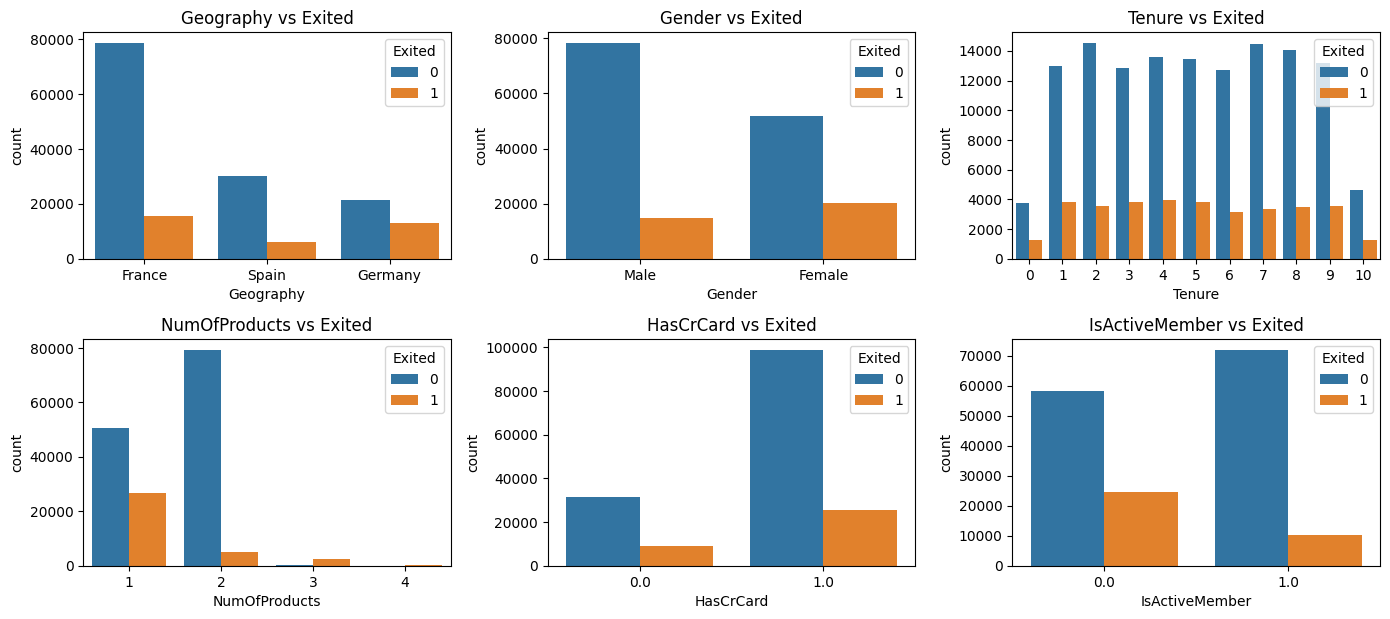

In [89]:
# Bar Charts
columns_non_bins = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
plt.figure(figsize=(14, len(columns_non_bins)*2))
for i, col in enumerate(columns_non_bins):
    plt.subplot(len(columns_non_bins)//2+1,3,i+1)
    sns.countplot(x=col, hue='Exited', data = train)
    plt.title(f'{col} vs Exited')
    plt.tight_layout()


In [90]:
def retention(feature):
    ''' This function allows us to check the percentage of clients that stayed or 
    the percentage of people that closed the account to give us more insights'''
    
    df_viz = train.groupby(feature)['Exited'].value_counts()
    df_viz = df_viz.unstack()
    df_viz.columns= ['Stayed', 'Exited']
    df_viz.reset_index(inplace=True)
    df_viz['Total'] = df_viz['Exited'] + df_viz['Stayed']
    df_viz[f'% of Stayed'] = df_viz['Stayed'] / df_viz['Total']*100
    df_viz[f'% of Exited'] = df_viz['Exited'] / df_viz['Total']*100
    df_viz.sort_values(by='% of Stayed', ascending=False, inplace=True)
    
    return df_viz

In [91]:
retention('Geography')

,Geography,Stayed,Exited,Total,% of Stayed,% of Exited
0,France,78643,15572,94215,83.471846,16.528154
2,Spain,29978,6235,36213,82.782426,17.217574
1,Germany,21492,13114,34606,62.104837,37.895163


### Analysis on Geography

#### For the first graph, (Geography), we find that France has more clients that stayed with the account and slightly more clients that closed the account then Germany. 

#### While Spain shows a similar percentage of clients with France who remained and closed their accounts, France has a larger overall client base. Conversely, Germany exhibits the lowest client retention rate.

### Analysis on Gender

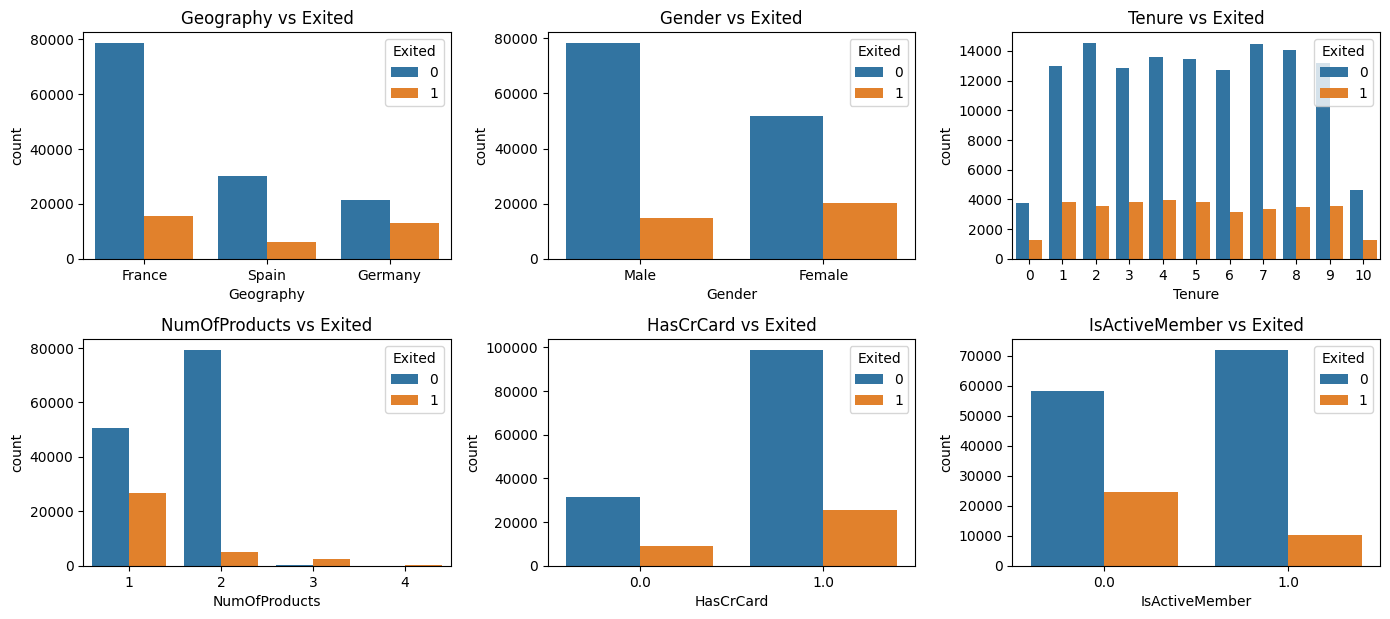

In [92]:
retention('Gender')

,Gender,Stayed,Exited,Total,% of Stayed,% of Exited
1,Male,78334,14816,93150,84.094471,15.905529
0,Female,51779,20105,71884,72.031328,27.968672


#### Upon visualization of the Gender vs. Exited graph, it's evident that a higher proportion of male clients remained with their accounts compared to females.

#### The difference in the retention rates between males and females is approximately 12%, with males showing a higher retention rate.

### Analysis on Tenure

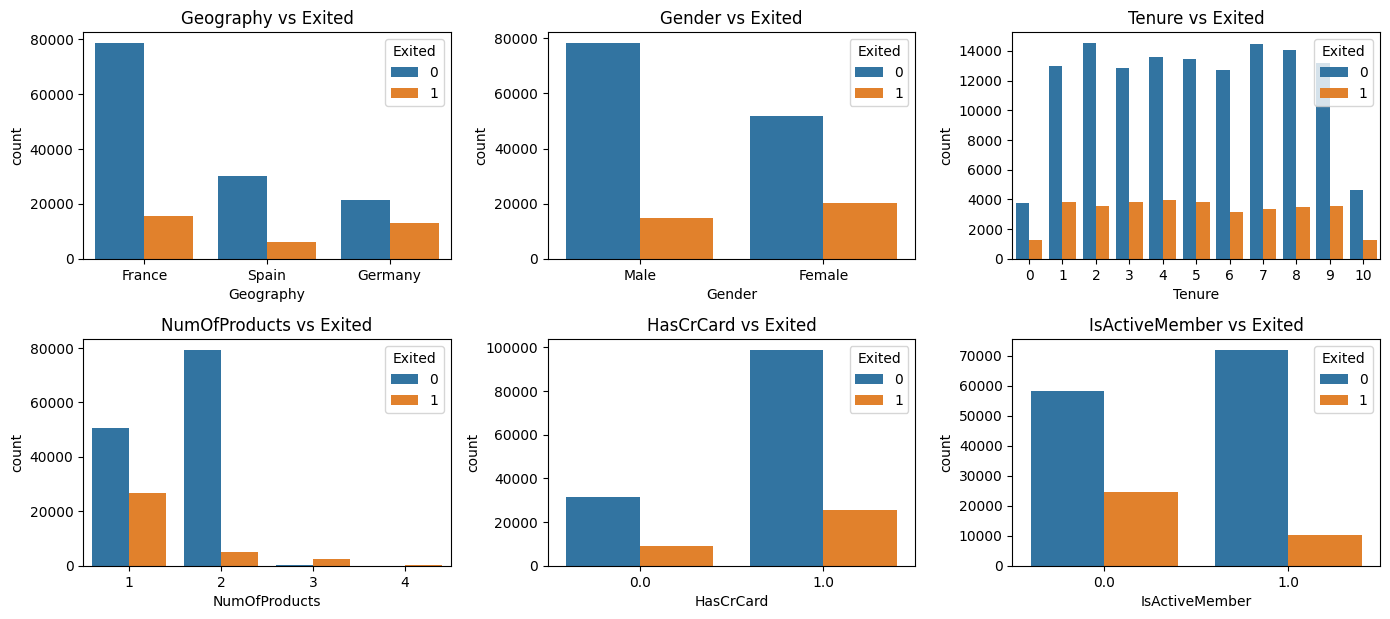

In [93]:
retention('Tenure')

,Tenure,Stayed,Exited,Total,% of Stayed,% of Exited
7,7,14469,3341,17810,81.240876,18.759124
2,2,14529,3516,18045,80.515378,19.484622
8,8,14052,3468,17520,80.205479,19.794521
6,6,12677,3145,15822,80.122614,19.877386
9,9,13165,3544,16709,78.789874,21.210126
10,10,4652,1257,5909,78.727365,21.272635
5,5,13468,3800,17268,77.993977,22.006023
1,1,12970,3790,16760,77.386635,22.613365
4,4,13580,3974,17554,77.361285,22.638715
3,3,12820,3810,16630,77.089597,22.910403


### Upon visualization of the graph depicting Tenure vs. Exited, it's apparent that there are fewer clients in their first year and in the eleventh year compared to other years.

### Analysis of Num Of Product

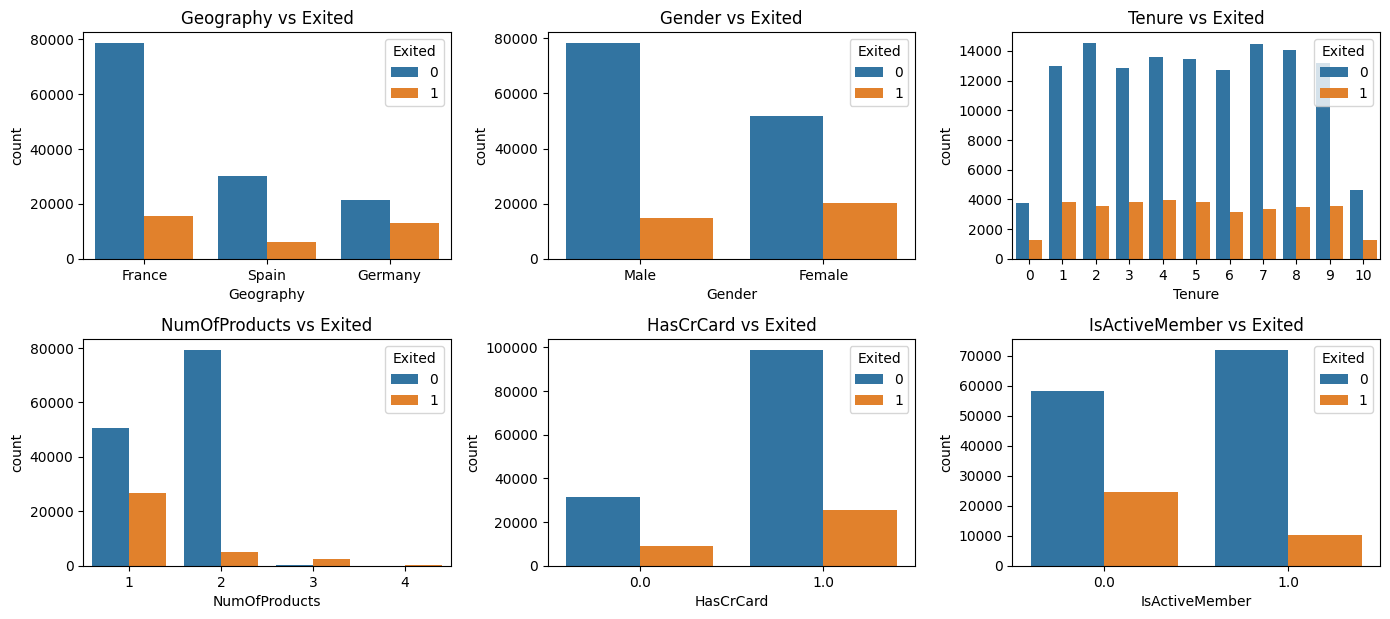

In [94]:
retention('NumOfProducts')

,NumOfProducts,Stayed,Exited,Total,% of Stayed,% of Exited
1,2,79198,5093,84291,93.957837,6.042163
0,1,50516,26858,77374,65.288081,34.711919
3,4,59,416,475,12.421053,87.578947
2,3,340,2554,2894,11.748445,88.251555


#### Upon examining the graph of NumOfProducts vs. Exited and conducting retention analysis, it becomes evident that clients with two products have a higher likelihood of remaining with their accounts.

### Analyis on HasCrCard

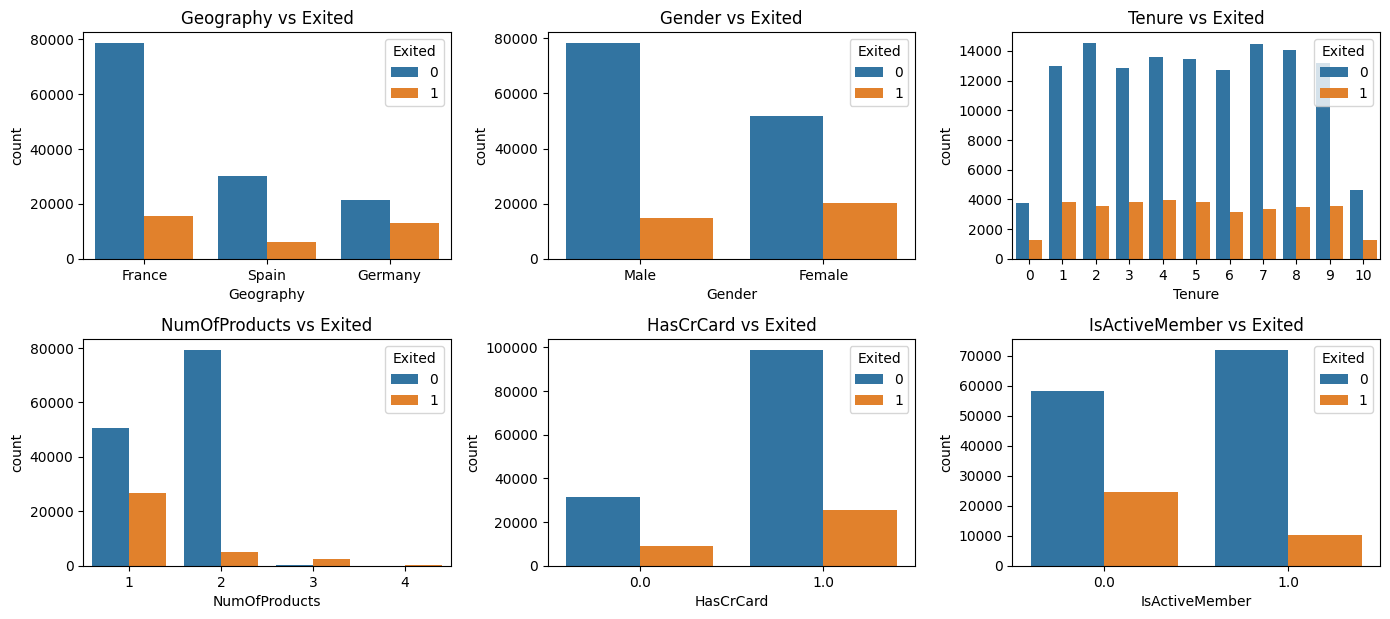

In [95]:
retention('HasCrCard')

,HasCrCard,Stayed,Exited,Total,% of Stayed,% of Exited
1,1.0,98742,25686,124428,79.356736,20.643264
0,0.0,31371,9235,40606,77.257056,22.742944


#### Upon visualization of the graph depicting HasCrCard vs. Exited, it's observed that there are more clients who remained with their accounts and have one credit card compared to those who don't have any.
#### However, there's a slight difference of 2% in the retention rate between clients with no credit cards and those with one credit card.

### Analysis of IsActiveMember

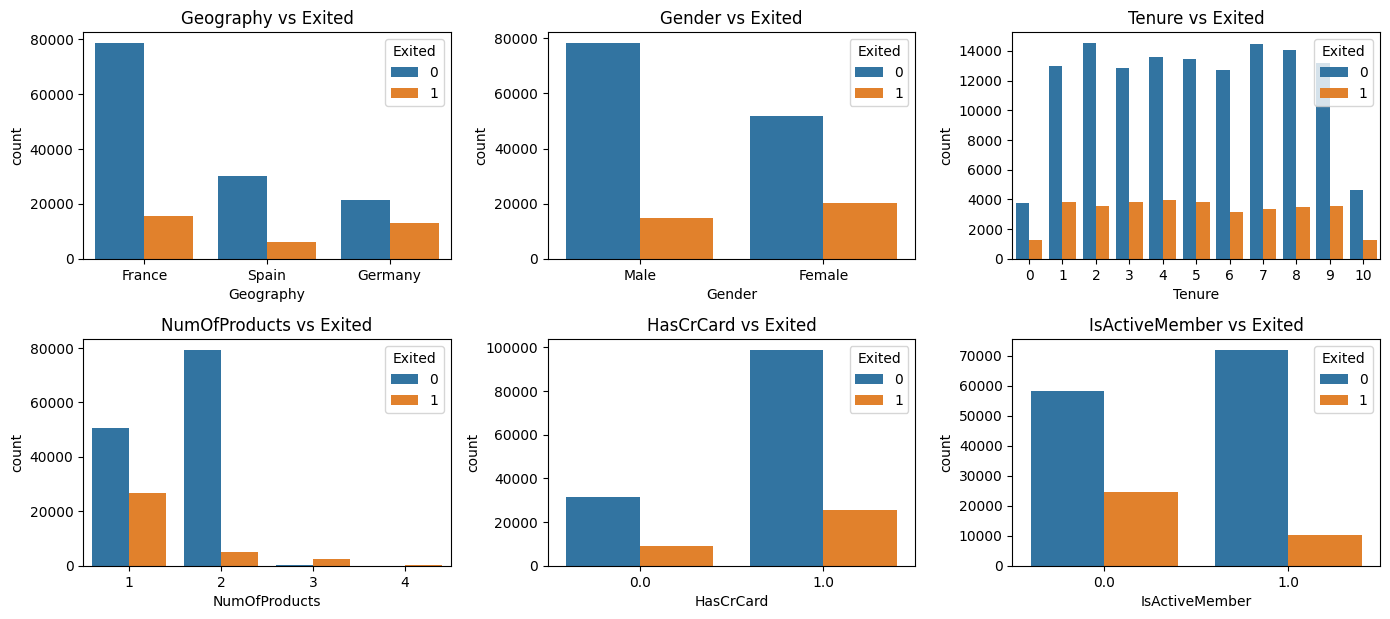

In [19]:
retention('IsActiveMember')

,IsActiveMember,Stayed,Exited,Total,% of Stayed,% of Exited
1,1.0,71852,10297,82149,87.465459,12.534541
0,0.0,58261,24624,82885,70.291368,29.708632


#### Upon examining the graph of IsActiveMember vs. Exited and conducting retention analysis, it's evident that clients who are active members exhibit approximately a 17% higher retention rate compared to those who are not.

### We will now explore the features suitable for histogram charts, namely CreditScore, Age, Balance, and EstimatedSalary


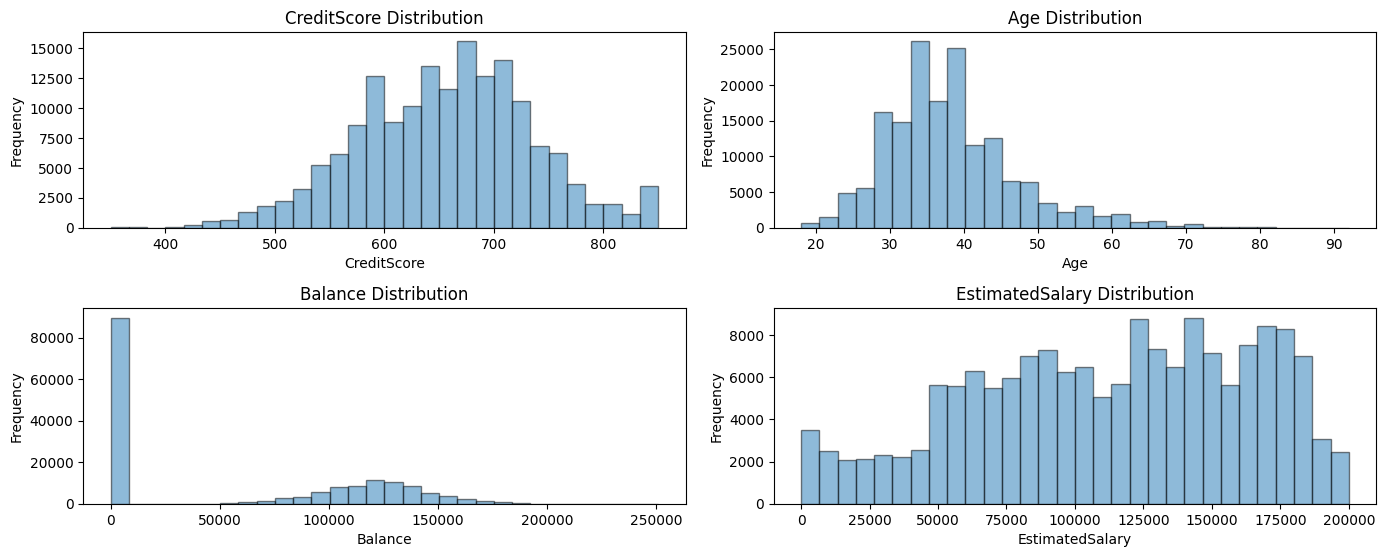

In [20]:
columns_bins = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
plt.figure(figsize=(14, len(columns_bins) * 2))
for i, col in enumerate(columns_bins):
    plt.subplot(len(columns_bins)//2 + 1, 2, i + 1)  # Adjust the number of columns to 2 for histograms
    plt.hist(train[col], bins=30, alpha=0.5, edgecolor='black')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


### Analysis

#### Credit Score Distribution:
##### Upon examining the first graph, depicting the distribution of credit scores, it's evident that the majority of account holders have credit scores ranging from 580 to 740.

#### Age Distribution:
##### In the second graph, representing the distribution of ages, we observe that most account holders fall within the age range of 28 to 45.

#### Balance Distribution:
##### The third graph reveals a substantial number of clients with a balance of 0.00. This could be due to fluctuating account balances, incomplete data entry, client preferences to withhold balance information, or actual zero balances.

#### Estimated Salary Distribution:
##### Lastly, the fourth graph illustrates the distribution of estimated salaries, indicating that the majority of account holders earn between 50,000.00 and 185,000.00.

<div align="center"><h1> Feature Engineering </h1></div>


#### Transform raw data into meaningful features that capture relevant information for modeling.
#### Select, create, or encode features based on domain knowledge and insights from EDA.
#### Handle categorical variables through techniques such as one-hot encoding, label encoding, or feature hashing.

#### We are now going to check for outliers and discard them for our train set. We will use the z_score from the scipy library in the stats section

In [21]:
from scipy import stats

In [22]:
columns =['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']

z_scores = np.abs(stats.zscore(train[columns]))
z_scores.describe().loc['max'].sort_values(ascending=False)

Age                6.075677
NumOfProducts      4.469589
CreditScore        3.825749
Balance            3.110918
EstimatedSalary    2.238162
Tenure             1.789054
HasCrCard          1.750507
IsActiveMember     1.004470
Name: max, dtype: float64

#### Given our threshold of 3, we'll exclusively consider columns with values exceeding this threshold.

In [23]:
columns = ['Age', 'NumOfProducts', 'CreditScore', 'Balance']
z_scores = np.abs(stats.zscore(train[columns]))
z_scores.describe().loc['max'].sort_values(ascending=False)

Age              6.075677
NumOfProducts    4.469589
CreditScore      3.825749
Balance          3.110918
Name: max, dtype: float64

In [24]:
outlier_indeces = np.where(np.any(np.abs(z_scores)>=3, axis=1))[0]

In [25]:
len(outlier_indeces)

2585

In [26]:
train.shape[0]

165034

In [27]:
train_filtered = train.drop(outlier_indeces)
train_filtered

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


### Now we will prepare by encoding or scalling the dataset train and test dataset for our machine learning model  

In [28]:
train_filtered.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0


In [29]:
train_filtered.describe().loc[['min', 'max']]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
min,417.0,18.0,0.0,0.00,1.0,0.0,0.0,11.58,0.0
max,850.0,64.0,10.0,238387.56,3.0,1.0,1.0,199992.48,1.0


### As far as the encoder/scalling we will use:
- One_hot_encoder for the columns: Geography, Gender
- MinMaxScaler for the Credit Score, Tenure, EstimatedSalary, Age, Balance and the NumOfProducts


In [30]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

In [31]:
one_columns = ['Geography', 'Gender']
min_max_columns =['CreditScore', 'Tenure', 'EstimatedSalary', 'Age','Balance','NumOfProducts']

In [32]:
def one_hot_encode(dataset, column):
    one_hot_encoder = OneHotEncoder(sparse_output=False)
    new_col = one_hot_encoder.fit_transform(dataset[[column]] )
    cols = one_hot_encoder.get_feature_names_out([column])
    dataset[cols] = new_col
    return print(f'Column: {column} completed')



In [33]:
for i in one_columns:
    one_hot_encode(train_filtered, i)

Column: Geography completed
Column: Gender completed


In [34]:
for i in one_columns:
    one_hot_encode(test, i)

Column: Geography completed
Column: Gender completed


In [35]:
def min_max_scale(dataset, column):
    scaler = MinMaxScaler()
    scaled_values = scaler.fit_transform(dataset[[column]])
    dataset[column] = scaled_values
    return print(f'Column: {column} scaled using MinMaxScaler')

In [36]:
for i in min_max_columns:
    min_max_scale(train_filtered, i)

Column: CreditScore scaled using MinMaxScaler
Column: Tenure scaled using MinMaxScaler
Column: EstimatedSalary scaled using MinMaxScaler
Column: Age scaled using MinMaxScaler
Column: Balance scaled using MinMaxScaler
Column: NumOfProducts scaled using MinMaxScaler


In [37]:
for i in min_max_columns:
    min_max_scale(test, i)

Column: CreditScore scaled using MinMaxScaler
Column: Tenure scaled using MinMaxScaler
Column: EstimatedSalary scaled using MinMaxScaler
Column: Age scaled using MinMaxScaler
Column: Balance scaled using MinMaxScaler
Column: NumOfProducts scaled using MinMaxScaler


In [38]:
train_filtered.drop(columns=['Geography', 'Gender'], axis=1, inplace=True)

In [39]:
test.drop(columns=['Geography', 'Gender'], axis=1, inplace=True)

In [40]:
print(train_filtered.columns)
print(test.columns)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')
Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')


<div align="center"><h1> Model Development and Evaluation </h1></div>

#### Split the data into training, validation, and test sets for model development and evaluation.
#### Select appropriate machine learning algorithms or models based on the problem type, data characteristics, and requirements.
#### Train the models using the training data and tune hyperparameters using cross-validation or other optimization techniques.
#### Evaluate model performance using appropriate metrics, such as ROC AUC.
#### Iterate on model development and refinement based on evaluation results, adjusting algorithms, features, or hyperparameters as needed.

#### Define features and targets. Split the data into training and test sets

In [41]:
features = train_filtered.loc[:, train_filtered.columns !='Exited']
targets = train_filtered['Exited']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state=42)

#### Select appropriate machine learning algorithms or models based on the problem type, data characteristics, and requirements.

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score


In [45]:
data ={'Logistic':LogisticRegression,
       'KNeighbors': KNeighborsClassifier,
       'Tree' : DecisionTreeClassifier,
       'Random Forest': RandomForestClassifier,
       'Gradient Boosting': GradientBoostingClassifier,
       'SVC': SVC,
       'MLP': MLPClassifier,
       'XGBOOST': XGBClassifier
       }

model_scores = {}
for name, model in data.items():
    clf = model()
    clf.fit(X_train, y_train)
    if name == 'SVC':
        pred = clf.decision_function(X_test)
    else:
        pred = clf.predict_proba(X_test)[:,1]
    roc_auc = roc_auc_score(y_test, pred)
    model_scores[name] = {'roc_auc_score': roc_auc}

data = [{'Model': model_name, **scores} for model_name, scores in model_scores.items()]

df_model = pd.DataFrame(data)
df_model.sort_values(by='roc_auc_score', ascending=False)

,Model,roc_auc_score
4,Gradient Boosting,0.885588
6,MLP,0.884167
7,XGBOOST,0.883781
3,Random Forest,0.869924
5,SVC,0.828141
0,Logistic,0.825583
1,KNeighbors,0.824750
2,Tree,0.703449


#### Gradient Boosting, MLP, XGBOOST, and Random Forest exhibit robust ROC-AUC scores. However, I intend to focus my hyperparameter tuning efforts solely on Gradient Boosting, XGBOOST, and Random Forest models.

In [78]:
from sklearn.model_selection import GridSearchCV, KFold

## Gradient Boosting Model

In [47]:
param_grid = {
    'n_estimators': [350, 400, 450,500],
    'learning_rate': [0.01,0.1,1,5],
    'max_features': [1,2,3,4,5]
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

clf = GradientBoostingClassifier(random_state=42)
grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=kf, scoring='roc_auc', n_jobs=4)
grid.fit(X_train, y_train)
print('Best Parameters:', grid.best_params_)
clf = grid.best_estimator_
clf.fit(X_train, y_train)
y_pred_proba = clf.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC_AUC Score: {roc_auc}')

Best Parameters: {'learning_rate': 0.1, 'max_features': 4, 'n_estimators': 500}
ROC_AUC Score: 0.887139306256198


### To streamline our workflow, we utilize joblib to store our trained models on the hard drive. This allows us to save time by avoiding the need to retrain the models every time we resume our work. Instead, we simply load the saved model whenever necessary to continue our tasks seamlessly.

In [57]:
import joblib

In [50]:
joblib.dump(clf, 'trained_model_5_2.pkl')

['trained_model_5_2.pkl']

In [58]:
model = joblib.load('trained_model_5_2.pkl')

In [60]:
pred = model.predict_proba(test)
prediction = pd.DataFrame()
prediction['id'] = df_test['id']
prediction['Exited'] = pred[:,1]
prediction
prediction.to_csv('prediction_5_03.csv', index=False)

#### My gradient boosting model achieved a ROC-AUC score of 0.887139306256198 during my local evaluation. However, on Kaggle's platform, the model received a score of 0.83494 for the private leaderboard and 0.83355 for the public leaderboard.

## XGBOOST Model

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

In [70]:

param_dist = {
    'learning_rate': uniform(0.01, 0.1),   
    'n_estimators': randint(100, 500),     
    'max_depth': randint(3, 10),           
    'subsample': uniform(0.6, 0.4),        
    'colsample_bytree': uniform(0.6, 0.4), 
    'gamma': uniform(0, 0.5),              
    'reg_alpha': uniform(0, 0.5),          
    'reg_lambda': uniform(0, 0.5) 
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

xgb_clf = XGBClassifier(random_state=42)
xgb_grid = RandomizedSearchCV(estimator=xgb_clf, param_distributions=param_dist,n_iter=100, cv=kf, scoring='roc_auc')
xgb_grid.fit(X_train, y_train)
print('Best Parameters:', xgb_grid.best_params_)
xgb_clf = xgb_grid.best_estimator_
xgb_clf.fit(X_train, y_train)
y_pred_proba = xgb_clf.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC_AUC Score: {roc_auc}')

Best Parameters: {'colsample_bytree': 0.6398989697281375, 'gamma': 0.14505723225624245, 'learning_rate': 0.0783093628954975, 'max_depth': 5, 'n_estimators': 186, 'reg_alpha': 0.4683935129083181, 'reg_lambda': 0.39564443083535705, 'subsample': 0.9554689618033314}
ROC_AUC Score: 0.8875753760212267


In [71]:
pred = xgb_clf.predict_proba(test)
prediction = pd.DataFrame()
prediction['id'] = df_test['id']
prediction['Exited'] = pred[:,1]

In [72]:
pred

array([[0.8639635 , 0.13603652],
       [0.5777919 , 0.4222081 ],
       [0.71956325, 0.28043672],
       ...,
       [0.76603085, 0.23396914],
       [0.86001605, 0.13998395],
       [0.8857136 , 0.11428642]], dtype=float32)

In [73]:
prediction.to_csv('xgb_prediction_5_03.csv', index=False)

#### My XGBOOST model achieved a ROC-AUC score of 0.8875753760212267 during my local evaluation. However, on Kaggle's platform, the model received a score of 0.68277 for the private leaderboard and 0.69071 for the public leaderboard. This diferance is probably because Kaggle splits their data diferently.

## Random Forest Classifier Model

In [75]:
param_dist = {
    'n_estimators': randint(100, 500),     
    'max_depth': randint(3, 10),           
    'min_samples_split': randint(2, 10),      
    'min_samples_leaf': randint(1, 10),        
    'max_features': uniform(0.6, 0.4),       
    'bootstrap': [True, False]              
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
rf_grid = RandomizedSearchCV(estimator=rf_clf, param_distributions=param_dist, n_iter=100, cv=kf, scoring='roc_auc', n_jobs=3)
rf_grid.fit(X_train, y_train)
print('Best Parameters:', rf_grid.best_params_)
rf_clf = rf_grid.best_estimator_
rf_clf.fit(X_train, y_train)
y_pred_proba = rf_clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC_AUC Score: {roc_auc}')

Best Parameters: {'bootstrap': True, 'max_depth': 9, 'max_features': 0.612141340195615, 'min_samples_leaf': 9, 'min_samples_split': 7, 'n_estimators': 105}
ROC_AUC Score: 0.8853342922844849


In [76]:
pred = rf_clf.predict_proba(test)
prediction = pd.DataFrame()
prediction['id'] = df_test['id']
prediction['Exited'] = pred[:,1]
prediction.to_csv('rf_prediction_5_03.csv', index=False)

In [77]:
prediction

,id,Exited
0,165034,0.016282
1,165035,0.443083
2,165036,0.036408
3,165037,0.185009
4,165038,0.224513
...,...,...
110018,275052,0.038259
110019,275053,0.081230
110020,275054,0.015706
110021,275055,0.155441


My Random Forest Classifier achieved a ROC-AUC score of 0.8853342922844849 during my local evaluation. However, on Kaggle's platform, the model received a score of 0.83293 for the private leaderboard and 0.83055 for the public leaderboard.

In [45]:
import joblib # Library for saving and loading models

In [48]:
model = joblib.load('trained_model_5_2.pkl') # load the model previously trained
pred = model.predict_proba(test) # predict probability
pred

array([[0.98302585, 0.01697415],
       [0.60359949, 0.39640051],
       [0.97223288, 0.02776712],
       ...,
       [0.98115609, 0.01884391],
       [0.85701771, 0.14298229],
       [0.89122153, 0.10877847]])

In [50]:
pred_percentage = pred*100
pred_percentage

array([[98.30258493,  1.69741507],
       [60.35994906, 39.64005094],
       [97.22328797,  2.77671203],
       ...,
       [98.1156092 ,  1.8843908 ],
       [85.7017706 , 14.2982294 ],
       [89.12215272, 10.87784728]])

Let's analyze the predictions from our model. The model outputs a two-dimensional array, where each index contains two values. At the first index, we have the values 0.98302585 and 0.01697415. The first value (0.98302585) represents the predicted probability that the observation belongs to the negative class (0), indicating the likelihood of the client staying with the account. In this case, there is approximately a 98.30% chance (0.98302585 * 100) of the client retaining the account. The second value represents the opposite scenario, indicating the probability of the client churning (closing the account), which is approximately 1.70% (0.01697415 * 100)

### Analyzing Results to Identify Patterns for Sales Team Retention Strategies

#### We'll now interpret the results to uncover potential patterns that can guide the sales team in offering targeted incentives to enhance client retention.

In [96]:
df_test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [97]:
df_test['Staying Percentage'] = pred_percentage[:,0].round(2)
df_test['Churning Percentage'] = pred_percentage[:,1].round(2)

In [98]:
df_test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Staying Percentage,Churning Percentage
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75,98.30,1.70
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27,60.36,39.64
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09,97.22,2.78
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57,84.42,15.58
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00,79.82,20.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62,96.77,3.23
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68,92.40,7.60
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38,98.12,1.88
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58,85.70,14.30


#### We'll exclude the 'id', 'CustomerId', 'Surname', and 'Gender' columns from our analysis as they are not required.

In [102]:
df = df_test

In [104]:
df.drop(columns=['id', 'CustomerId', 'Surname', 'Gender', 'Balance'], axis=1, inplace=True)

In [105]:
df

,CreditScore,Geography,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Staying Percentage,Churning Percentage
0,586,France,23.0,2,2,0.0,1.0,160976.75,98.30,1.70
1,683,France,46.0,2,1,1.0,0.0,72549.27,60.36,39.64
2,656,France,34.0,7,2,1.0,0.0,138882.09,97.22,2.78
3,681,France,36.0,8,1,1.0,0.0,113931.57,84.42,15.58
4,752,Germany,38.0,10,1,1.0,0.0,139431.00,79.82,20.18
...,...,...,...,...,...,...,...,...,...,...
110018,570,Spain,29.0,7,1,1.0,1.0,148087.62,96.77,3.23
110019,575,France,36.0,4,1,1.0,1.0,42181.68,92.40,7.60
110020,712,France,31.0,2,2,1.0,0.0,16287.38,98.12,1.88
110021,709,France,32.0,3,1,1.0,1.0,158816.58,85.70,14.30


In [106]:
df['Geography'].value_counts()

France     63171
Spain      23913
Germany    22939
Name: Geography, dtype: int64

#### We'll categorize the data into three geographic groups, enabling each branch to implement customized sales tactics tailored to their respective countries.

In [107]:
france = df[df['Geography']=='France']
spain = df[df['Geography']=='Spain']
germany = df[df['Geography']=='Germany']

<div align="center"><h1> France </h1></div>

In [108]:
france.head()

,CreditScore,Geography,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Staying Percentage,Churning Percentage
0,586,France,23.0,2,2,0.0,1.0,160976.75,98.30,1.70
1,683,France,46.0,2,1,1.0,0.0,72549.27,60.36,39.64
2,656,France,34.0,7,2,1.0,0.0,138882.09,97.22,2.78
3,681,France,36.0,8,1,1.0,0.0,113931.57,84.42,15.58
5,593,France,22.0,9,2,0.0,0.0,51907.72,96.32,3.68


C:\Users\steph\AppData\Local\Temp\ipykernel_22992\991797489.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = france.corr()


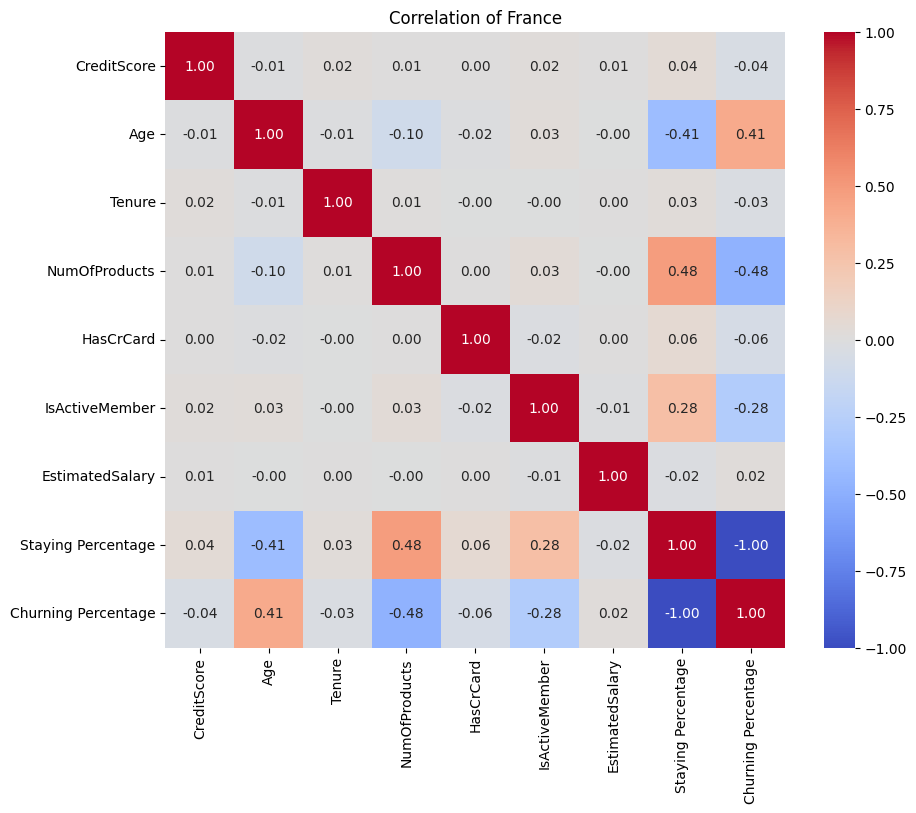

In [109]:
correlation = france.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation of France');

Upon visualization, three features stand out: NumOfProducts, Age, and IsActiveMember.

**NumberOfProducts**
- The sales team can consider promoting more products to clients, perhaps offering additional products when they open their account.

**Age**
- There appears to be a correlation suggesting that older clients are more likely to churn. The sales team could develop special products or account benefits targeted towards older clients to increase retention.

**IsActiveMember**
- While the exact definition of IsActiveMember is unclear, assuming it refers to clients actively using their accounts for financial transactions rather than being active military members, the sales team could focus on encouraging account activity. This could involve incentivizing clients to use their checking accounts for deposits and setting up automated bill payments to promote account engagement and reduce churn.


<div align="center"><h1> Spain </h1></div>

C:\Users\steph\AppData\Local\Temp\ipykernel_22992\3576022522.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = spain.corr()


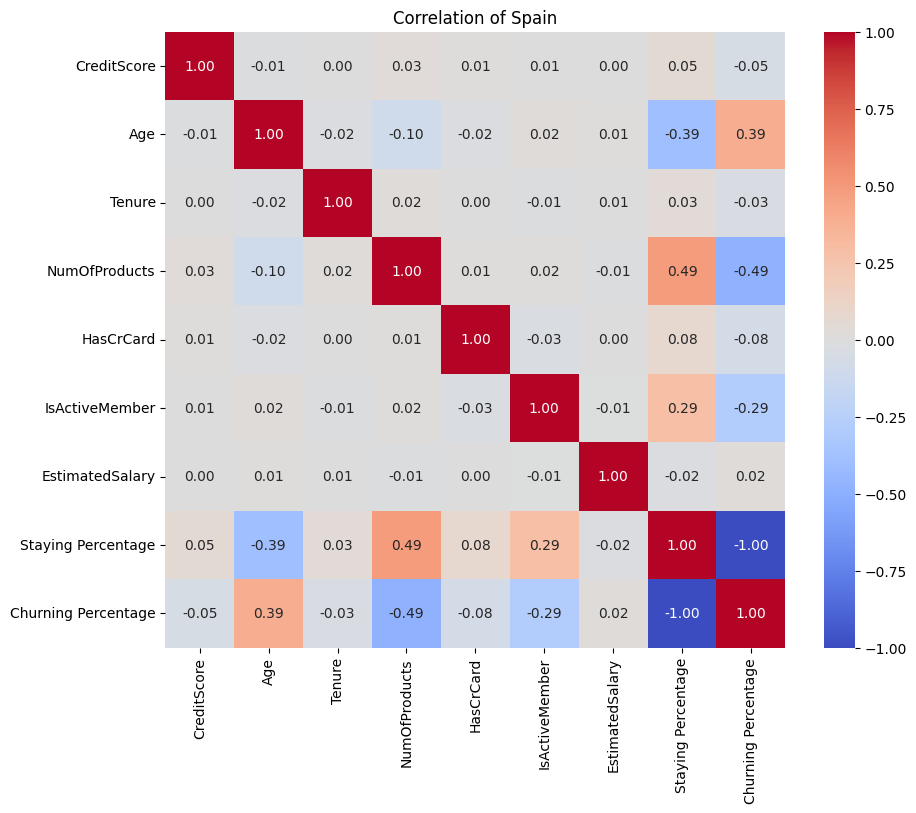

In [110]:
correlation = spain.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation of Spain');

#### Similar tactics can be applied in Spain as in France.


<div align="center"><h1> Germany </h1></div>

C:\Users\steph\AppData\Local\Temp\ipykernel_22992\2377239843.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = germany.corr()


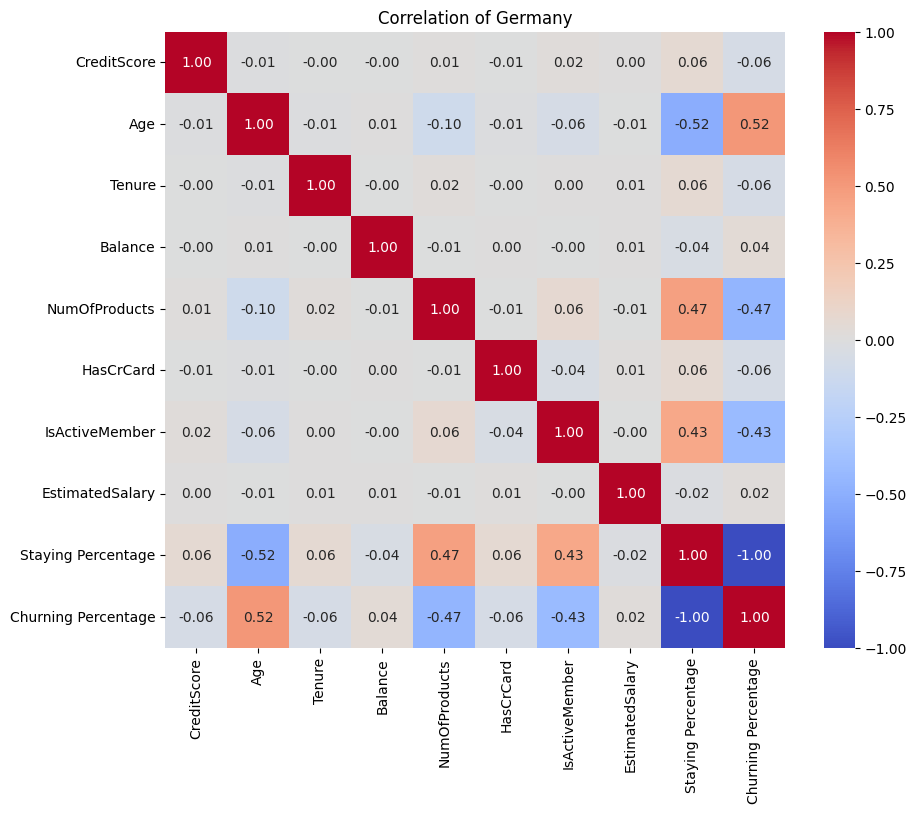

In [74]:
correlation = germany.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation of Germany');

#### Similar tactics can be applied in Germany as in France, with a greater emphasis on account activity and special benefits for older clients.



C:\Users\steph\AppData\Local\Temp\ipykernel_22992\2442944993.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


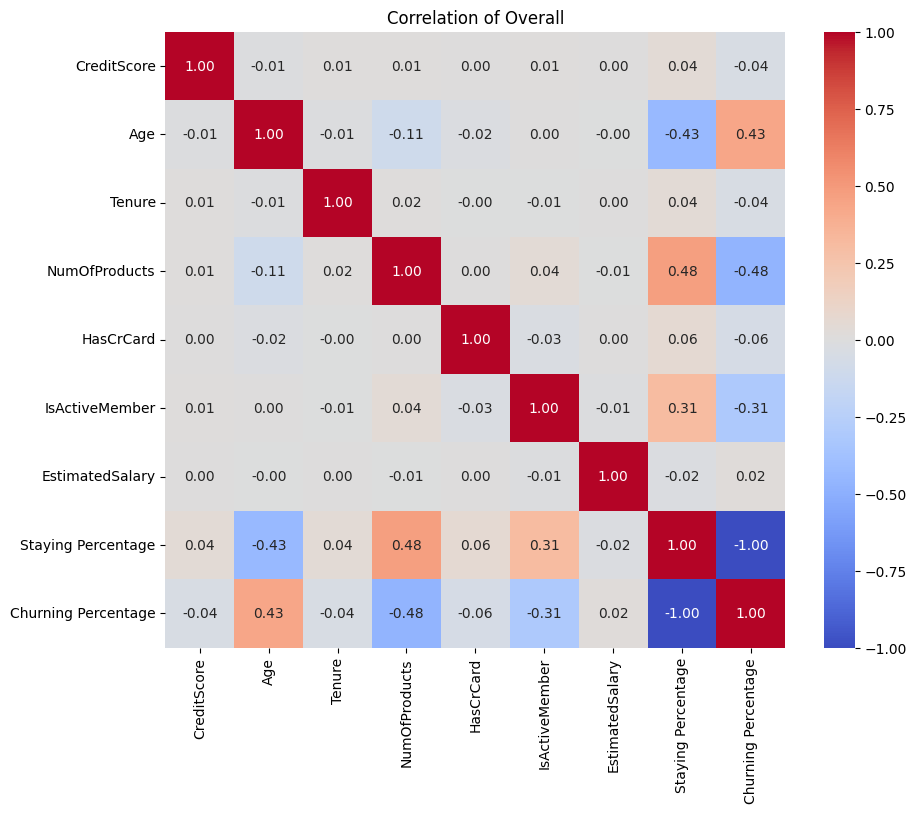

In [111]:
correlation = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation of Overall');

<div align="center"><h1> Conclusion </h1></div>

**Geography:**
- France has a higher number of clients both staying and churning compared to Germany. However, Germany experiences a higher churn rate (~38%) compared to France's (~17%).
- Spain, despite having fewer clients than France, exhibits a churn rate very close to that of France.

**Gender:**
- A higher proportion of male clients remain with their accounts compared to females, with males showing approximately 12% higher retention rates.

**Tenure:**
- There are fewer clients in their first and eleventh years compared to other years, indicating a potential drop-off point in client tenure.

**Number of Products:**
- Clients with two products show a higher likelihood of remaining with their accounts.

**Have Credit Cards:**
- Clients with one credit card show higher retention rates compared to those with none, albeit with a slight difference of 2%.

**Active Member:**
- Active members exhibit approximately a 17% higher retention rate compared to non-active members.

**Analysis of Clients based on Credit Score, Age, Balance, Estimated Salary:**

**Credit Score:**
- Majority of account holders have credit scores ranging from 580 to 740.

**Age:**
- Majority of clients fall within the age range of 28 to 45.

**Balance:**
- Many clients have a balance of 0.00, potentially due to various reasons such as fluctuating balances, incomplete data, or actual zero balances.

**Estimated Salary Distribution:**
- Majority of clients have estimated salaries falling between 50,000.00 and 185,000.00.

**Model Selection:**
- Gradient Boosting, XGBoost, and Random Forest Classifier are suitable machine learning techniques for this scenario, with Gradient Boosting achieving a score of approximately 88.71% in roc-auc.

**Analysis of Results to Identify Patterns for Sales Team Retention Strategies:**

**Number of Products:**
- Promoting additional products to clients, particularly during account opening, could enhance retention rates.

**Age:**
- Older clients show a correlation with higher churn rates, suggesting a need for tailored products or benefits to retain them.

**IsActiveMember:**
- Encouraging account activity, such as incentivizing deposits and automated bill payments, could improve retention rates, especially in Germany where greater emphasis on account activity and special benefits for older clients may yield better results.




**Personal Achievements:** 
- This competition has significantly enhanced my comprehension of outliers, encoding techniques, and the ROC-AUC metric, based on what I studied. 


  